In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()

In [2]:
df = pd.read_csv('../data/crop_yield.csv')
print(df.head())

  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.517573  
4                7.24825

In [3]:
print(df.tail())

       Region Soil_Type    Crop  Rainfall_mm  Temperature_Celsius  \
999995   West      Silt    Rice   302.805345            27.987428   
999996  South    Chalky  Barley   932.991383            39.661039   
999997  North     Peaty  Cotton   867.362046            24.370042   
999998   West      Silt   Wheat   492.812857            33.045505   
999999   West     Sandy   Maize   180.936180            27.298847   

        Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
999995            False            False             Sunny               76   
999996             True            False             Rainy               93   
999997             True            False            Cloudy              108   
999998            False            False             Sunny              102   
999999             True            False             Sunny               76   

        Yield_tons_per_hectare  
999995                1.347586  
999996                7.311594  
999997     

## What is the correlation between rainfall and crop yield for different types of crops?
- Will use the following columns: `Rainfall_mm`, `Crop`, `Yield_tons_per_hectare`
- Correlation code: Default to Pearson -> `corr, p_val = pearsonr(df[col1], df[col2])`
    - Should use Pearson because we're assuming a normal distribution with a linear relationship. Will double check by plotting the data.

In [7]:
unique_crops = df['Crop'].unique()
print(unique_crops)

['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']


The Pearson correlation between Rainfall_mm and Yield_tons_per_hectare for Cotton Crops is: 0.7646747641104158 with a p-value of: 0.0


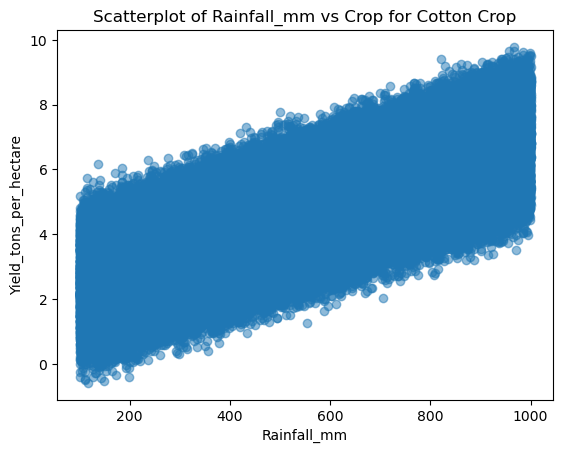

In [10]:
from scipy.stats import pearsonr, spearmanr
var1 = 'Rainfall_mm'
var2 = 'Crop'
var3 = 'Yield_tons_per_hectare'
var4 = 'Cotton'

# Copy df with just cotton crop entries
cotton_df = df[df[var2] == var4]

# Apply pearson correlation between rainfall and yield for cotton crops
cotton_cor, cotton_p = pearsonr(cotton_df[var1], cotton_df[var3])
print(f'The Pearson correlation between {var1} and {var3} for {var4} Crops is: {cotton_cor} with a p-value of: {cotton_p}')

# Plot correlation 
plt.scatter(cotton_df[var1], cotton_df[var3], alpha=0.5)
plt.xlabel(var1)
plt.ylabel(var3)
plt.title(f'Scatterplot of {var1} vs {var2} for {var4} Crop')
plt.show()



['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']
   Region Soil_Type    Crop  Rainfall_mm  Temperature_Celsius  \
0    West     Sandy  Cotton   897.077239            27.676966   
11   East     Sandy  Cotton   145.300681            19.755535   
12  South     Peaty  Cotton   607.150252            15.562163   
17  North      Clay  Cotton   416.898632            23.190810   
20   East      Clay  Cotton   990.267439            24.072052   

    Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0             False             True            Cloudy              122   
11             True             True            Cloudy              141   
12             True             True             Sunny              136   
17             True             True             Sunny               95   
20            False             True             Sunny              110   

    Yield_tons_per_hectare  
0                 6.555816  
11                4.367612  
12                

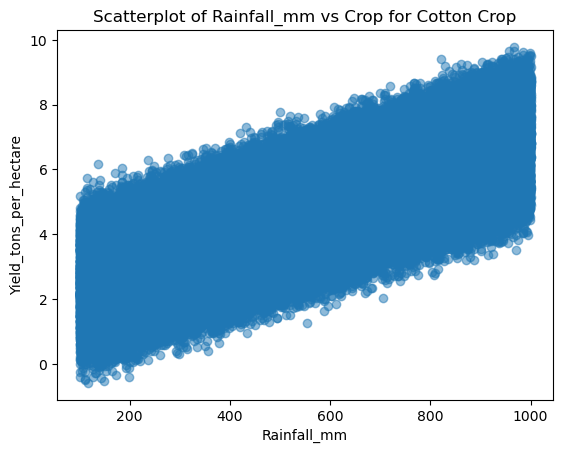

   Region Soil_Type  Crop  Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
1   South      Clay  Rice   992.673282            18.026142             True   
7   South     Sandy  Rice   441.131154            30.887107             True   
15   East    Chalky  Rice   874.456744            27.256869             True   
22   West      Clay  Rice   935.802765            20.887774             True   
31  South      Silt  Rice   476.682779            29.341043             True   

    Irrigation_Used Weather_Condition  Days_to_Harvest  Yield_tons_per_hectare  
1              True             Rainy              140                8.527341  
7              True             Sunny               61                5.829542  
15            False             Sunny              115                5.839291  
22             True             Rainy               71                7.756962  
31             True             Sunny               67                6.407034  
The Pearson correlation between R

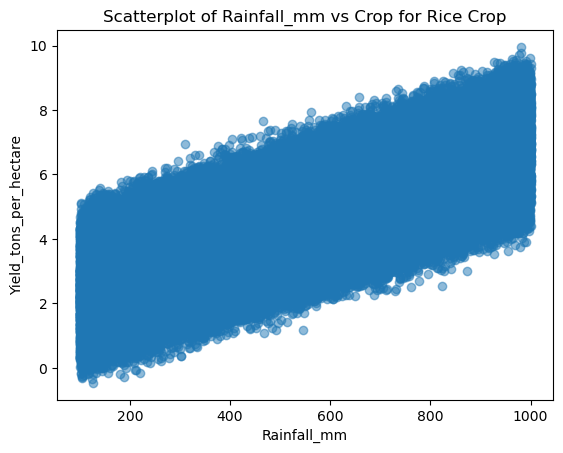

   Region Soil_Type    Crop  Rainfall_mm  Temperature_Celsius  \
2   North      Loam  Barley   147.998025            29.794042   
13   East      Clay  Barley   929.123735            29.677303   
14  North     Peaty  Barley   621.778388            26.843173   
18  North     Sandy  Barley   977.259083            17.604100   
21   West      Loam  Barley   183.939698            34.227923   

    Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
2             False            False             Sunny              106   
13            False             True             Rainy              134   
14             True            False             Rainy               77   
18            False             True             Sunny               93   
21             True            False            Cloudy               99   

    Yield_tons_per_hectare  
2                 1.127443  
13                6.493031  
14                4.573219  
18                5.778099  
21           

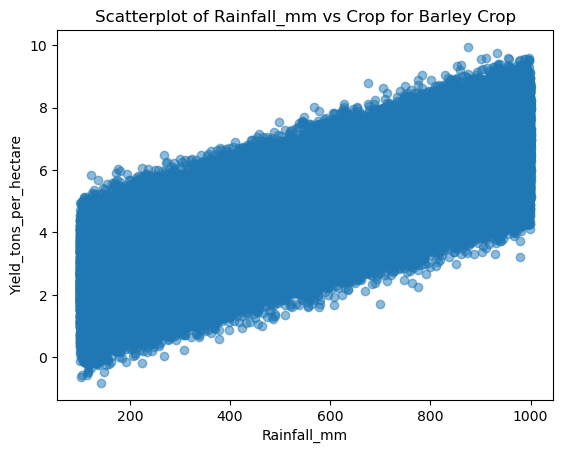

   Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
3   North     Sandy  Soybean   986.866331            16.644190   
5   South      Silt  Soybean   797.471182            37.704974   
33  North      Loam  Soybean   600.199754            20.935360   
58   West     Sandy  Soybean   408.219312            21.852215   
66  North    Chalky  Soybean   997.408397            16.188839   

    Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
3             False             True             Rainy              146   
5             False             True             Rainy               74   
33             True            False             Sunny               75   
58            False             True            Cloudy              133   
66             True            False             Sunny              139   

    Yield_tons_per_hectare  
3                 6.517573  
5                 5.898416  
33                4.898181  
58                4.881094  
66     

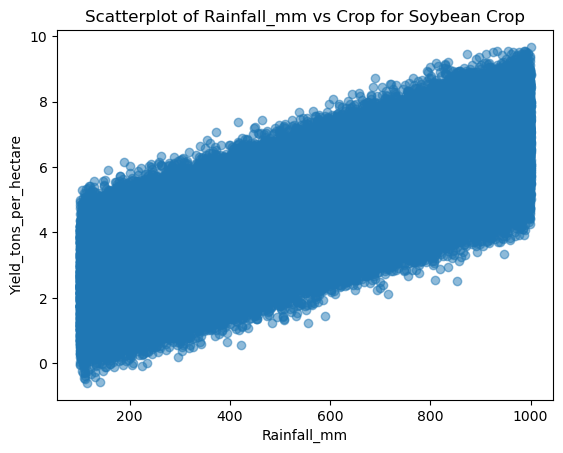

   Region Soil_Type   Crop  Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
4   South      Silt  Wheat   730.379174            31.620687             True   
6    West      Clay  Wheat   357.902357            31.593431            False   
8   North      Silt  Wheat   181.587861            26.752729             True   
9    West     Sandy  Wheat   395.048968            17.646199            False   
10  North     Peaty  Wheat   385.135314            21.656192            False   

    Irrigation_Used Weather_Condition  Days_to_Harvest  Yield_tons_per_hectare  
4              True            Cloudy              110                7.248251  
6             False             Rainy               90                2.652392  
8             False             Sunny              127                2.943716  
9              True             Rainy              140                3.707293  
10            False             Sunny               73                2.564442  
The Pearson correlation bet

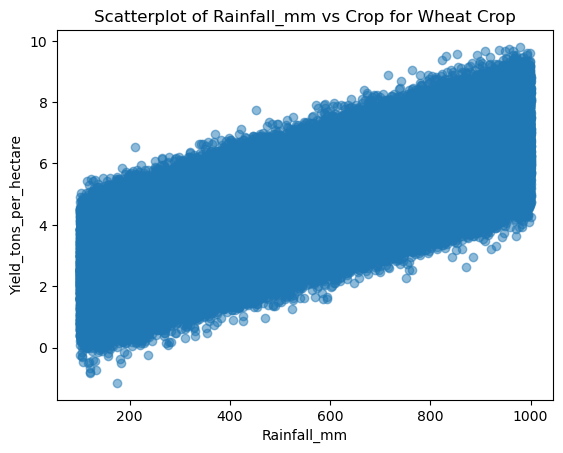

   Region Soil_Type   Crop  Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
19  South      Clay  Maize   888.207630            39.945509             True   
25   East    Chalky  Maize   170.814456            29.116377            False   
28  South      Silt  Maize   259.418125            17.261892            False   
30   East      Silt  Maize   609.798764            38.265851             True   
36   East      Clay  Maize   599.875493            19.909292             True   

    Irrigation_Used Weather_Condition  Days_to_Harvest  Yield_tons_per_hectare  
19            False             Rainy               76                7.173037  
25             True             Sunny              133                2.332255  
28            False             Sunny              110                2.338541  
30            False            Cloudy              127                5.113588  
36            False            Cloudy               63                4.696425  
The Pearson correlation bet

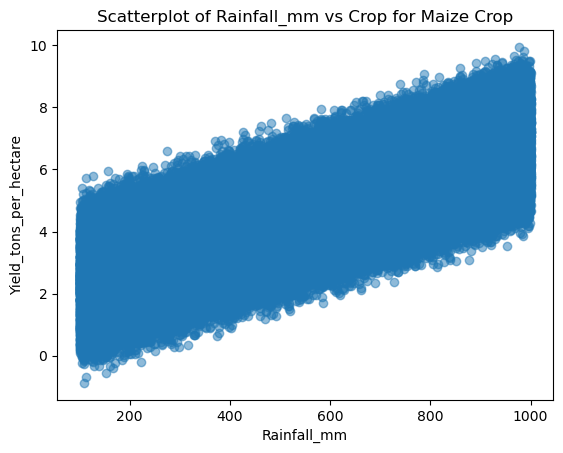

In [16]:
from scipy.stats import pearsonr, spearmanr
var1 = 'Rainfall_mm'
var2 = 'Crop'
var3 = 'Yield_tons_per_hectare'

print(unique_crops)
for crop in unique_crops:
    filtered_df = df.loc[df[var2] == crop]
    print(filtered_df.head())
    # Apply pearson correlation between rainfall and yield for cotton crops
    crop_cor, crop_p = pearsonr(filtered_df[var1], filtered_df[var3])
    print(f'The Pearson correlation between {var1} and {var3} for {crop} Crops is: {crop_cor} with a p-value of: {crop_p}')

    # Plot correlation 
    plt.scatter(filtered_df[var1], filtered_df[var3], alpha=0.5)
    plt.xlabel(var1)
    plt.ylabel(var3)
    plt.title(f'Scatterplot of {var1} vs {var2} for {crop} Crop')
    plt.show()

